<a href="https://colab.research.google.com/github/dealtron/ASD_MultiList/blob/master/Bank_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Data Science Course - Telkom Digital Talent Incubator*


---




# **Classification**

Here we model the classification model from telco customer churn data (https://www.kaggle.com/blastchar/telco-customer-churn). This data is consist of customer profile, customer subscription history, and their churn information.

Each row represents a customer, each column contains customer’s attributes described below:
1.   customerID : Customer ID
2.   gender : Whether the customer is a male or a female
3.   SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
4.   Partner : Whether the customer has a partner or not (Yes, No)
5.   Dependents : Whether the customer has dependents or not (Yes, No)
6.   tenure : Number of months the customer has stayed with the company
7.   PhoneService : Whether the customer has a phone service or not (Yes, No)
8.   MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
9.   InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
10.   OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11.   OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
12.   DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13.   TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
14.   StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
15.   StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
16.   Contract : The contract term of the customer (Month-to-month, One year, Two year)
17.   PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
18.   PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19.   MonthlyCharges : The amount charged to the customer monthly
20.   TotalCharges : The total amount charged to the customer
21.   Churn Whether: the customer churned or not (Yes or No)

We will predict customer behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Import Libraries

In [ ]:
# Import Library
import pandas as pd

Import Raw Dataset

In [ ]:
# Import Data to Google Colab
df_churn = pd.read_csv('https://raw.githubusercontent.com/dealtron/Bank-Classification/main/bank.csv', sep = ',')
df_churn

# Show 10 first Row
df_churn.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
# Prints the Dataset Information
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
# Prints Descriptive Statistics
df_churn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


Data Preprocessing

Handling Missing Values

In [ ]:
# Check for Missing Values
df_churn.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# Search for Median Value
median = df_churn['TotalCharges'].median()

# Use Median to Replace Missing Values
df_churn['TotalCharges'].fillna(median, inplace=True)

# Check for Missing Values
df_churn.isnull().sum()

KeyError: ignored

Encode Categorical Data

In [ ]:
# Import Module
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_churn[['gender', 'InternetService', 'Contract', 'PaymentMethod']]))
df_encoded.columns = encoder.get_feature_names(['gender', 'InternetService', 'Contract', 'PaymentMethod'])

# Replace Categotical Data with Encoded Data
df_churn.drop(['gender', 'InternetService', 'Contract', 'PaymentMethod'] ,axis=1, inplace=True)
df_encoded= pd.concat([df_churn, df_encoded], axis=1)

# Show Encoded Dataframe
df_encoded

KeyError: ignored

Set Feature and Target

In [ ]:
# Select Features
feature = df_encoded.drop(['customerID', 'TotalCharges', 'Churn'], axis=1)
feature

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,0,1,2985,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,1,0,1,0,0,0,0,5695,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,1,0,0,0,0,1,5385,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,0,1,1,0,0,0,423,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,0,1,707,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,0,1,1,1,1,1,848,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7039,0,1,1,72,1,0,1,1,0,1,1,1,1032,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7040,0,1,1,11,0,1,0,0,0,0,0,1,296,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,1,1,0,4,1,0,0,0,0,0,0,1,744,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Select Target
target = df_encoded['Churn']
target

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

Set Training and Testing Data

In [ ]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test  = train_test_split(feature , target, shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 25)
(2113, 25)
(4930,)
(2113,)


In [ ]:
X_test

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3381,0,0,0,41,1,1,0,1,1,1,1,1,7985,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6180,1,0,0,66,1,1,0,0,0,1,1,1,1024,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4829,0,0,0,12,1,0,0,0,0,0,0,1,45,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3737,0,0,0,5,1,0,0,0,0,0,0,1,506,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4249,0,1,1,10,1,0,1,1,0,0,1,1,659,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,0,0,1,10,0,1,1,0,1,0,0,0,4025,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1351,0,1,1,11,1,0,0,0,0,0,0,1,2045,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2048,1,0,0,21,1,0,0,1,0,1,1,1,968,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6218,0,1,1,70,0,0,1,1,1,1,1,1,584,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


#### ***Decision Tree***

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making.

Modeling Decision Tree

In [ ]:
# Import Module
from sklearn import tree

# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(X_train, y_train)

# Predict to Test Data 
y_pred_dtc = dtc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


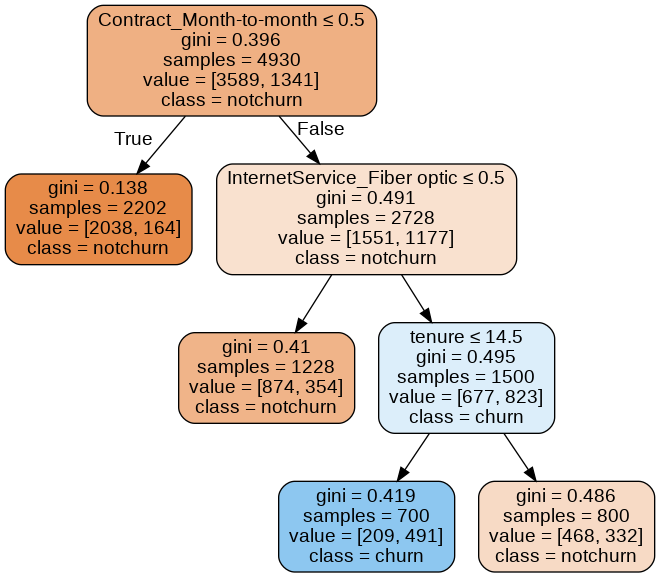

In [ ]:
# Visualize Tree

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=['notchurn', 'churn'],
                feature_names=['SeniorCitizen',	'Partner',	'Dependents', 'tenure',	'PhoneService', 'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',
                               'TechSupport',	'StreamingTV',	'StreamingMovies',	'PaperlessBilling',	'MonthlyCharges', 'gender_Female',
                               'gender_Male',	'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',	'Contract_Month-to-month',
                               'Contract_One year',	'Contract_Two year',	'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
                               'PaymentMethod_Electronic check',	'PaymentMethod_Mailed check'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Model Evaluation

In [ ]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
cm_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
cm_dtc

array([[1494,   91],
       [ 327,  201]])

In [ ]:
# Show the Accuracy, Precision, Recall
acc_dtc = metrics.accuracy_score(y_test, y_pred_dtc)
prec_dtc = metrics.precision_score(y_test, y_pred_dtc)
rec_dtc = metrics.recall_score(y_test, y_pred_dtc)
f1_dtc = metrics.f1_score(y_test, y_pred_dtc)
kappa_dtc = metrics.cohen_kappa_score(y_test, y_pred_dtc)

print("Accuracy:", acc_dtc)
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:", f1_dtc)
print("Cohens Kappa Score:", kappa_dtc)

Accuracy: 0.8021769995267393
Precision: 0.6883561643835616
Recall: 0.3806818181818182
F1 Score: 0.4902439024390244
Cohens Kappa Score: 0.3798855303768567


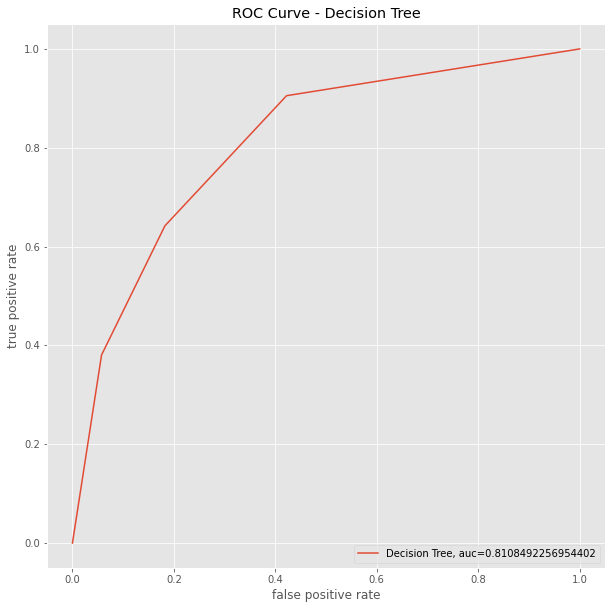

In [ ]:
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set Size and Style
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

# Visualize ROC Curve
y_pred_dtc_proba = dtc.predict_proba(X_test)[::,1]
fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_dtc_proba)
aucdtc = metrics.roc_auc_score(y_test, y_pred_dtc_proba)
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.title('ROC Curve - Decision Tree')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

#### ***Naive Bayes***

Modeling Naive Bayes

In [ ]:
# Import Module
from sklearn.naive_bayes import GaussianNB 

# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(X_test)

NameError: ignored

Model Evaluation

In [ ]:
# Show the Confussion Matrix
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cm_gnb

In [ ]:
# Show the Accuracy, Precision, Recall
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb)
rec_gnb = metrics.recall_score(y_test, y_pred_gnb)
f1_gnb = metrics.f1_score(y_test, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:", f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

In [ ]:
# ROC Curve
y_pred_gnb_proba = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(y_test,  y_pred_gnb_proba)
aucgnb = metrics.roc_auc_score(y_test, y_pred_gnb_proba)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

#### ***Model Comparison***

In [ ]:
# Comparing Model Performance
print("Decision Tree Accuracy =",acc_dtc)
print("Decision Tree Precision =",prec_dtc)
print("Decision Tree Recall =",rec_dtc)
print("Decision Tree F1-Score =", f1_dtc)
print("_______________________")
print("Naive Bayes Accuracy =", acc_gnb)
print("Naive Bayes Precision =", prec_gnb)
print("Naive Bayes Recall =", rec_gnb)
print("Naive Bayes F1-Score =", f1_gnb)

Decision Tree Accuracy = 0.8021769995267393
Decision Tree Precision = 0.6883561643835616
Decision Tree Recall = 0.3806818181818182
Decision Tree F1-Score = 0.4902439024390244
_______________________
Naive Bayes Accuracy = 0.7543776620918126
Naive Bayes Precision = 0.5052754982415005
Naive Bayes Recall = 0.8162878787878788
Naive Bayes F1-Score = 0.6241853729181751


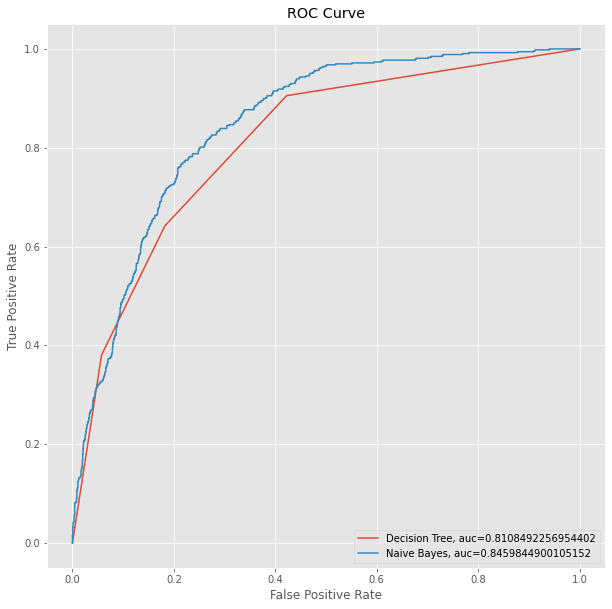

In [ ]:
# Comparing ROC Curve
plt.plot(fprdtc,tprdtc,label="Decision Tree, auc="+str(aucdtc))
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# Create Datafame Contains Fature and Result of prediction
df_compare = X_test.copy()
df_compare['ActualClass'] = y_test
df_compare['DecisonTree'] = y_pred_dtc
df_compare['NaiveBayes'] = y_pred_gnb

In [ ]:
df_compare.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,ActualClass,DecisonTree,NaiveBayes
3381,0,0,0,41,1,1,0,1,1,1,1,1,7985,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0
6180,1,0,0,66,1,1,0,0,0,1,1,1,1024,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0,0
4829,0,0,0,12,1,0,0,0,0,0,0,1,45,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1
3737,0,0,0,5,1,0,0,0,0,0,0,1,506,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1
4249,0,1,1,10,1,0,1,1,0,0,1,1,659,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0


#### **Predict New Data**

Import New Data

In [ ]:
# Import New Dataset
df_new_churn = pd.read_csv('https://raw.githubusercontent.com/dianrdn/data/master/churn_new.csv', sep =';')
df_new_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,NEW001,Female,1,1,0,69,1,Fiber optic,1,1,0,0,1,1,Month-to-month,1,Electronic check,1003,448395
1,NEW002,Male,0,0,0,47,0,No,0,0,0,0,0,0,Month-to-month,0,Electronic check,2025,1785
2,NEW003,Male,0,0,0,55,1,Fiber optic,0,0,0,0,1,1,Month-to-month,1,Credit card (automatic),947,168795
3,NEW004,Male,0,0,0,12,1,No,0,0,0,0,0,0,One year,1,Credit card (automatic),2005,7545
4,NEW005,Male,0,1,0,65,1,Fiber optic,0,0,0,1,1,1,Month-to-month,1,Electronic check,1006,506965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NEW396,Female,0,0,0,50,1,DSL,0,0,0,0,0,0,Month-to-month,1,Credit card (automatic),453,453
396,NEW397,Male,0,1,1,2,1,Fiber optic,0,0,0,1,1,0,Two year,1,Bank transfer (automatic),915,323635
397,NEW398,Male,0,0,0,67,1,DSL,0,0,0,1,1,1,Month-to-month,1,Electronic check,7345,26611
398,NEW399,Male,0,1,1,71,1,DSL,0,1,0,0,0,1,Two year,0,Mailed check,6405,39026


Preprocess the New Data

In [ ]:
# Import Module
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_new_churn2 = pd.DataFrame(encoder.fit_transform(df_new_churn[['gender', 'InternetService', 'Contract', 'PaymentMethod']]))
df_new_churn2.columns = encoder.get_feature_names(['gender', 'InternetService', 'Contract', 'PaymentMethod'])

# Concat the Encoded Data
df_new_churn_encoded = df_new_churn.drop(['gender', 'InternetService', 'Contract', 'PaymentMethod'] ,axis=1, inplace=True)
df_new_churn_encoded = pd.concat([df_new_churn, df_new_churn2], axis=1)

# Show Encoded Dataframe
df_new_churn_encoded

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,NEW001,1,1,0,69,1,1,1,0,0,1,1,1,1003,448395,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,NEW002,0,0,0,47,0,0,0,0,0,0,0,0,2025,1785,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,NEW003,0,0,0,55,1,0,0,0,0,1,1,1,947,168795,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,NEW004,0,0,0,12,1,0,0,0,0,0,0,1,2005,7545,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,NEW005,0,1,0,65,1,0,0,0,1,1,1,1,1006,506965,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NEW396,0,0,0,50,1,0,0,0,0,0,0,1,453,453,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
396,NEW397,0,1,1,2,1,0,0,0,1,1,0,1,915,323635,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
397,NEW398,0,0,0,67,1,0,0,0,1,1,1,1,7345,26611,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
398,NEW399,0,1,1,71,1,0,1,0,0,0,1,0,6405,39026,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# Select Features
new_feature = df_new_churn_encoded.drop(['customerID', 'TotalCharges'], axis=1)
new_feature

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,1,0,69,1,1,1,0,0,1,1,1,1003,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,47,0,0,0,0,0,0,0,0,2025,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,55,1,0,0,0,0,1,1,1,947,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,0,12,1,0,0,0,0,0,0,1,2005,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,1,0,65,1,0,0,0,1,1,1,1,1006,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,50,1,0,0,0,0,0,0,1,453,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
396,0,1,1,2,1,0,0,0,1,1,0,1,915,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
397,0,0,0,67,1,0,0,0,1,1,1,1,7345,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
398,0,1,1,71,1,0,1,0,0,0,1,0,6405,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Predict New Customer Data

In [ ]:
# Predict using Decision Tree Classifier
new_predicted_dtree = pd.DataFrame(dtc.predict(new_feature), columns = ['churn_decision_tree'])
new_predicted_dtree.reset_index()
new_predicted_dtree

,churn_decision_tree
0,0
1,0
2,0
3,0
4,0
...,...
395,0
396,0
397,0
398,0


In [ ]:
# Predict using Naive Bayes Classifier
new_predicted_nb = pd.DataFrame(gnb.predict(new_feature), columns = ['churn_naive_bayes'])
new_predicted_nb.reset_index()
new_predicted_nb

,churn_naive_bayes
0,1
1,0
2,1
3,0
4,1
...,...
395,0
396,0
397,1
398,0


Show Prediction Comparation

In [ ]:
# Show Prediction Result
pred_new_churn = pd.concat([df_new_churn, new_predicted_dtree, new_predicted_nb], axis=1)
pred_new_churn

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,churn_decision_tree,churn_naive_bayes
0,NEW001,1,1,0,69,1,1,1,0,0,1,1,1,1003,448395,0,1
1,NEW002,0,0,0,47,0,0,0,0,0,0,0,0,2025,1785,0,0
2,NEW003,0,0,0,55,1,0,0,0,0,1,1,1,947,168795,0,1
3,NEW004,0,0,0,12,1,0,0,0,0,0,0,1,2005,7545,0,0
4,NEW005,0,1,0,65,1,0,0,0,1,1,1,1,1006,506965,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NEW396,0,0,0,50,1,0,0,0,0,0,0,1,453,453,0,0
396,NEW397,0,1,1,2,1,0,0,0,1,1,0,1,915,323635,0,0
397,NEW398,0,0,0,67,1,0,0,0,1,1,1,1,7345,26611,0,1
398,NEW399,0,1,1,71,1,0,1,0,0,0,1,0,6405,39026,0,0


Save Prediction Result

In [ ]:
# Save Prediction Result
pred_new_churn.to_csv('new_churn_prediction.csv', index=False)